# <div class="alert alert-block alert-info"><center><font color =green>**MALIGNANT vs BENIGN ANALYSIS**</font></center></div>
## <center><font color =green>Comparing Predictive Accuracy of Machine Learning Models on Breast Cancer Data</font></center>
### <center>Completed By: Angela Spirou, William Escobar, & Jing Wang</center>
### Contents:
* [Part 1: Data Exploration](#DATA) 
* [Part 2: Data Visualizations](#VISUALIZATIONS-OF-CLEAN-DATA)
* [Part 3: Data Preprocessing](#DATA-PREPROCESSING)
* [Part 4: Machine Learning Models](#MACHINE-LEARNING-MODELS)
* [Part 5: Model Comparison - ROC Curve](#MODEL-COMPARISON---ROC-CURVE)
***

In [1]:
#Dependencies

import pandas as pd
import seaborn as sns
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

from scipy.stats import pearsonr

from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

import seaborn as sns
#roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

/Users/jingwang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/jingwang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/jingwang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/jingwang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will b

***

# <div class="alert alert-block alert-warning"><center>DATA</center></div>

## <center>Original Data: Breast Cancer Wisconsin (Diagnostic)</center>

In [2]:
# Original Data

data=pd.read_csv("data/original_data.csv", header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


![cancer cells](images/cancer_cells.png)

In [3]:
# Gain statistical information on original data

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# View the number of rows and columns in original data set 

print ("Num of rows: " + str(data.shape[0]))
print ("Num of columns: " + str(data.shape[1])) 

Num of rows: 569
Num of columns: 33


## <center>Data Cleaning</center>

In [5]:
# Drop column named "Unnamed:32" that only holds NA values

data_clean = data.drop(columns=["id", "Unnamed: 32"])

In [6]:
# Convert strings to numerical values with M (malignant) = 1 and B (benign) = 0

data_clean.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

In [7]:
# Convert all data types to float in order to work with numbers in models 

data_clean = data_clean.astype(float)
data_clean.dtypes

diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
# Save clean data set & view it

data_clean.to_csv("data/data_clean")
data_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***

# <div class="alert alert-block alert-warning"><center>VISUALIZATIONS OF CLEAN DATA</center></div>

In [9]:
# Split clean data into two dataframes by diagnosis - used only for visualizations

dfM = data_clean[data_clean['diagnosis'] ==1]
dfB = data_clean[data_clean['diagnosis'] ==0]

## <center>Pie Chart</center>

In [10]:
# Pie Chart
trace = go.Pie(labels = ['benign','malignant'], values = data_clean['diagnosis'].value_counts(), 
        textfont=dict(size=15), opacity = 0.8,
        marker=dict(colors=['lightgreen', 'pink'], 
        line=dict(color='#000000', width=1.5)))

layout = dict(title =  'Distribution of diagnosis variables')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## <center>Feautures vs. Diagnosis</center>

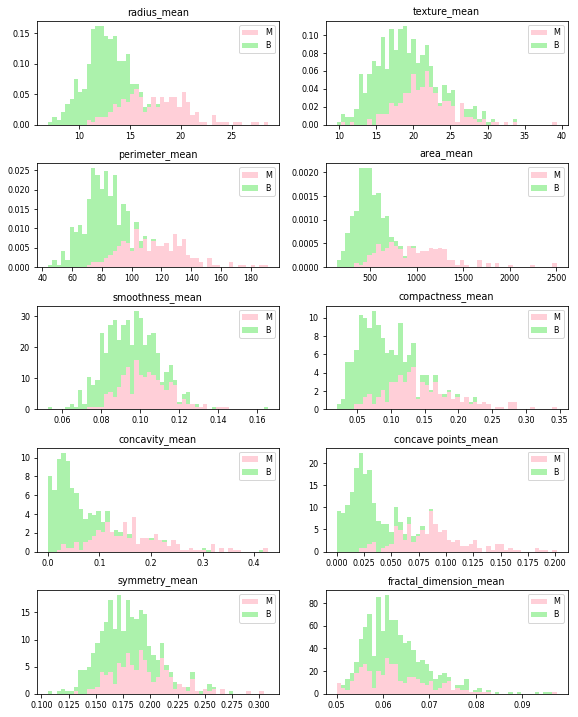

In [11]:
# Nucleus features vs diagnosis
features_mean=list(data_clean.columns[1:11])

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data_clean[features_mean[idx]]) - min(data_clean[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data_clean[features_mean[idx]]), max(data_clean[features_mean[idx]]) + binwidth, binwidth) , alpha=0.75,stacked=True, density = True, label=['M','B'],color=['pink', 'lightgreen'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.savefig("images/feat_vs_diag.png")
plt.show()

## <center>Heatmap & Statistic</center>

### Heatmap to show the correlations between all the MEAN features


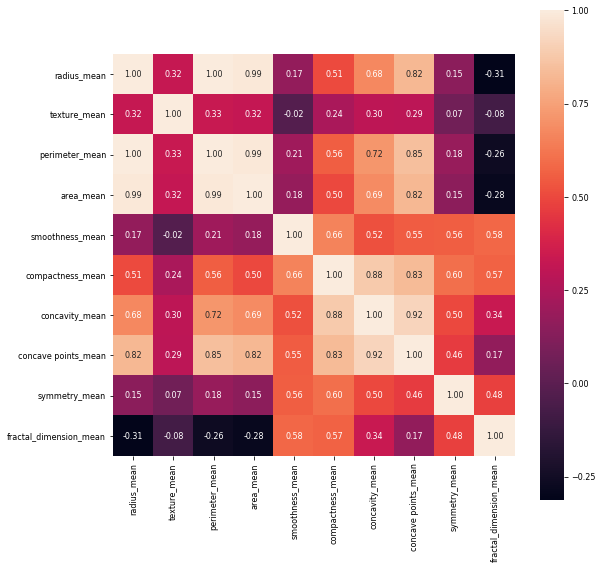

In [12]:
data_clean_corr_mean = data_clean[["radius_mean", "texture_mean", "perimeter_mean",
                    "area_mean", "smoothness_mean", "compactness_mean",
                    "concavity_mean", "concave points_mean", "symmetry_mean",
                    "fractal_dimension_mean"]].corr()
# show heapmap of correlations
plt.figure(figsize=(9,9))
heatmap = sns.heatmap(data_clean_corr_mean, cbar = True,  square = True, annot=True,fmt= '.2f',annot_kws={'size': 8})
heatmap.figure.savefig("images/heatmap.png")

### Features correlation calcultion

In [16]:
# calculate two features correlation

corr1_two = (pearsonr(data_clean['radius_mean'], data_clean['perimeter_mean'])[0])
print('Correlation between the three features is : %.2f' % corr_two)

Correlation between the three features is : 1.00


In [19]:
# calculate two features correlation

corr2_two = (pearsonr(data_clean['concavity_mean'], data_clean['concave points_mean'])[0])
print('Correlation between the two features is : %.2f' % corr2_two)

Correlation between the two features is : 0.92


## <center>Specific Correlations Visualized</center>

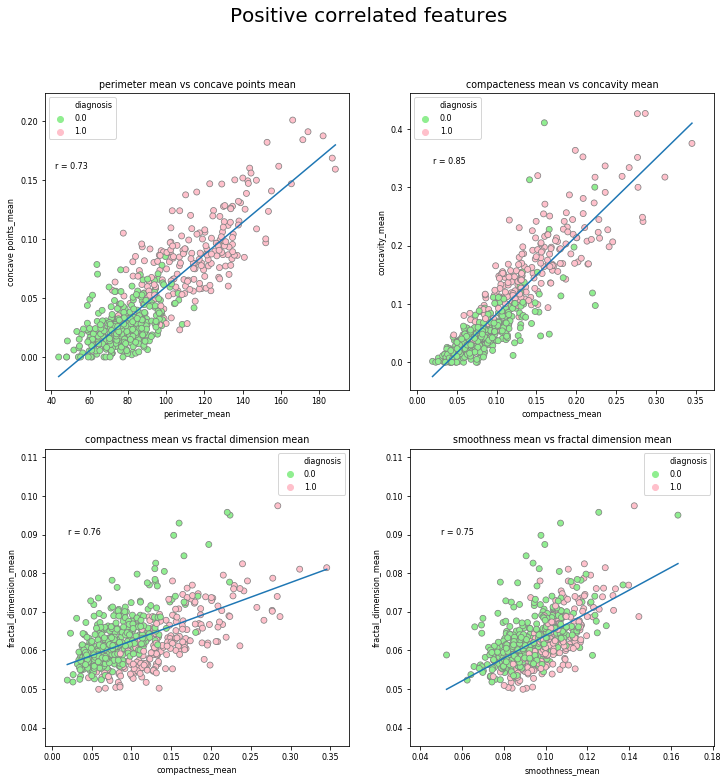

In [16]:
# Richard - will change via the heatmap data 

palette ={0 : 'lightgreen', 1 : 'pink'}
edgecolor = 'grey'

# Plot 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data_clean['perimeter_mean'], y = data_clean['concave points_mean'], hue = "diagnosis",data = data_clean, palette = palette, edgecolor=edgecolor)

# Best fitted line
plt.plot(np.unique(data_clean['perimeter_mean']), np.poly1d(np.polyfit((data_clean['perimeter_mean']), (data_clean['concave points_mean']), 1))(np.unique(data_clean['perimeter_mean'])))
plt.annotate('r = 0.73', xy=(42,0.16))
plt.title('perimeter mean vs concave points mean')

plt.subplot(222)
ax2 = sns.scatterplot(x = data_clean['compactness_mean'], y = data_clean['concavity_mean'], hue = "diagnosis",data = data_clean, palette =palette, edgecolor=edgecolor)

# Best fitted line
plt.plot(np.unique(data_clean['compactness_mean']), np.poly1d(np.polyfit((data_clean['compactness_mean']), (data_clean['concavity_mean']), 1))(np.unique(data_clean['compactness_mean'])))
plt.annotate('r = 0.85', xy=(0.02,0.34))
plt.title('compacteness mean vs concavity mean')

plt.subplot(223)
ax3 = sns.scatterplot(x = data_clean['compactness_mean'], y = data_clean['fractal_dimension_mean'], hue = "diagnosis",data = data_clean, palette =palette, edgecolor=edgecolor)

# Best fitted line
plt.plot(np.unique(data_clean['compactness_mean']), np.poly1d(np.polyfit((data_clean['compactness_mean']), (data_clean['fractal_dimension_mean']), 1))(np.unique(data_clean['compactness_mean'])))
plt.annotate('r = 0.76', xy=(0.02,0.09))
plt.title('compactness mean vs fractal dimension mean')

plt.subplot(224)
ax3 = sns.scatterplot(x = data_clean['smoothness_mean'], y = data_clean['fractal_dimension_mean'], hue = "diagnosis",data = data_clean, palette =palette, edgecolor=edgecolor)

# Best fitted line
plt.plot(np.unique(data_clean['smoothness_mean']), np.poly1d(np.polyfit((data_clean['smoothness_mean']), (data_clean['fractal_dimension_mean']), 1))(np.unique(data_clean['smoothness_mean'])))
plt.annotate('r = 0.75', xy=(0.05,0.09))
plt.title('smoothness mean vs fractal dimension mean')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('images/positive_corr.png')
plt.show()

***

# <div class="alert alert-block alert-warning"><center>DATA PREPROCESSING</center></div>

In [17]:
# Drop the diagnosis column

data_model = data_clean.drop("diagnosis", axis=1)
feature_names = data_model.columns
data_model.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## <center>Prepare Data for Logistical Regression:</center>

In [18]:
# Create target with diagnosis:

target_logreg = data_clean["diagnosis"]

In [19]:
# Split the data into Training and Testing:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    data_model, target_logreg, random_state=42, stratify=target_logreg)

In [20]:
# Logistical Regression Split data information:

print('Training Data has ' + str(X_train_reg.shape[0]) + ' observations with ' + str(X_train_reg.shape[1]) + ' features')
print('Test Data has ' + str(X_test_reg.shape[0]) + ' observations with ' + str(X_test_reg.shape[1]) + ' features')

Training Data has 426 observations with 30 features
Test Data has 143 observations with 30 features


## <center>Prepare Data for SVM & Neural Network Models:</center>

In [21]:
# Create target with diagnosis that has been reshaped:

target = data_clean["diagnosis"].values.reshape(-1,1)
target_names = ["benign", "malignant"]

In [22]:
# Split the data into Training and Testing:

X_train, X_test, y_train, y_test = train_test_split(
    data_model, target, random_state=42, stratify=target)

In [23]:
# SVM & Neural Network Split data information:

print('Training Data has ' + str(X_train.shape[0]) + ' observations with ' + str(X_train.shape[1]) + ' features')
print('Test Data has ' + str(X_test.shape[0]) + ' observations with ' + str(X_test.shape[1]) + ' features')

Training Data has 426 observations with 30 features
Test Data has 143 observations with 30 features


In [24]:
# Specific variables used for SVM Model:

X_train_svm = X_train
X_test_svm = X_test
y_train_svm = y_train
y_test_svm = y_test

### Neural Network Model needs additional manipulation to variables:

In [25]:
# Scale the Data: 
# Use the StandardScaler model to the training data of X

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# One-hot encoding:
# This is done due to the categorical aspects of the target data

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [27]:
# Create specific variables for the Neural Network Model based off the scaled & encoded data:

X_train_neuro = X_train_scaled
y_train_neuro = y_train_categorical

X_test_neuro = X_test_scaled
y_test_neuro = y_test_categorical

***

# <div class="alert alert-block alert-warning"><center>MACHINE LEARNING MODELS</center></div>

## <center>Logistical Regression</center>

In [28]:
classifier_reg = LogisticRegression()
classifier_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
classifier_reg.fit(X_train_reg, y_train_reg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print(f"Train Acc: %.2f"% classifier_reg.score(X_train_reg, y_train_reg))
print(f"Test Acc: %.2f" % classifier_reg.score(X_test_reg, y_test_reg))

Train Acc: 0.96
Test Acc: 0.94


In [31]:
predictions_reg = classifier_reg.predict(X_test_reg)
pred_reg = pd.DataFrame({"Prediction": predictions_reg, "Actual": y_test_reg})
pred_reg.head(20)
# See 86 and 479 where the Prediction != from the Actual

,Prediction,Actual
12,1.0,1.0
506,0.0,0.0
321,1.0,1.0
71,0.0,0.0
375,0.0,0.0
362,0.0,0.0
442,0.0,0.0
125,0.0,0.0
267,0.0,0.0
347,0.0,0.0


## <center>Support Vector Machine (SVM)</center>

### Prediction with Support Vector Machine(SVM) 

In [32]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_svm, y_train_svm)
predictions_svm = model_svm.predict(X_test_svm)

In [33]:
# Calculate classification report
print(classification_report(y_test_svm, predictions_svm,target_names=target_names))

              precision    recall  f1-score   support

      benign       0.93      0.98      0.95        90
   malignant       0.96      0.87      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



### Calculate model accuracy for one-fold validation

In [34]:
# Model Accuracy
print('Test Acc: %.2f' % model_svm.score(X_test_svm, y_test_svm))

Test Acc: 0.94


### Use 5-fold cross validation to get the accuracy of SVM model

![5-fold cross validation](images/5-fold_cross_validation.png)

In [35]:
classifier_SVC = SVC(kernel='linear')

cv_score = model_selection.cross_val_score(classifier_SVC, X_train_svm, y_train_svm, cv=5)
print('Model accuracy of SVM is: %.2f' % (cv_score.mean()))

Model accuracy of SVM is: 0.96


## <center>Neural Network Models</center>

In [36]:
# View shape of data:

print(data_model.shape, target.shape)

(569, 30) (569, 1)


In [37]:
# Create a Sequential Model:

model_neuro = Sequential()

In [38]:
# Add first layer with number of inputs and number of nodes within the hidden layer:

# Number of inputs is 30 - based off the data_model.shape of (569,30)
number_inputs = 30

# Number of hidden nodes is the mean of the neurons in the input and output layers (mean = (30+2)/2)
number_hidden_nodes = 16

# Compile first layer:
model_neuro.add(Dense(units=number_hidden_nodes,activation='relu', input_dim=number_inputs))

W1001 19:56:15.453775  2728 deprecation.py:506] From C:\Users\angsp\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
# Add output layer with activation function and number of predicted classes:

# Softmax is used for classification since it makes the output layer have one node per class (2 in this case, benign vs malignant)
model_neuro.add(Dense(units=2, activation='softmax'))

In [40]:
# View the model summary:

model_neuro.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 530
Trainable params: 530
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile Model:
# Use categorical crossentropy for categorical data

model_neuro.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# Fit the model to the training data:

model_neuro.fit(
    X_train_neuro,
    y_train_neuro,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
426/426 - 0s - loss: 0.5662 - acc: 0.7465
Epoch 2/100
426/426 - 0s - loss: 0.3725 - acc: 0.9131
Epoch 3/100
426/426 - 0s - loss: 0.2786 - acc: 0.9413
Epoch 4/100
426/426 - 0s - loss: 0.2284 - acc: 0.9531
Epoch 5/100
426/426 - 0s - loss: 0.1965 - acc: 0.9577
Epoch 6/100
426/426 - 0s - loss: 0.1732 - acc: 0.9554
Epoch 7/100
426/426 - 0s - loss: 0.1564 - acc: 0.9601
Epoch 8/100
426/426 - 0s - loss: 0.1429 - acc: 0.9648
Epoch 9/100
426/426 - 0s - loss: 0.1322 - acc: 0.9671
Epoch 10/100
426/426 - 0s - loss: 0.1235 - acc: 0.9695
Epoch 11/100
426/426 - 0s - loss: 0.1160 - acc: 0.9695
Epoch 12/100
426/426 - 0s - loss: 0.1094 - acc: 0.9718
Epoch 13/100
426/426 - 0s - loss: 0.1040 - acc: 0.9742
Epoch 14/100
426/426 - 0s - loss: 0.0992 - acc: 0.9742
Epoch 15/100
426/426 - 0s - loss: 0.0948 - acc: 0.9765
Epoch 16/100
426/426 - 0s - loss: 0.0911 - acc: 0.9789
Epoch 17/100
426/426 - 0s - loss: 0.0877 - acc: 0.9812
Epoch 18/100
426/426 - 0s - loss: 0.0845 - acc: 0.9812
Epoch 19/100
426/42

In [43]:
# Save the model:

model_neuro.save("model/malignancy_vs_benign.h5")

In [44]:
# Load the model:

model_neuro = load_model("model/malignancy_vs_benign.h5")

W1001 19:56:20.042182  2728 deprecation.py:506] From C:\Users\angsp\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1001 19:56:20.048164  2728 deprecation.py:506] From C:\Users\angsp\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [45]:
# Evaluate the model using the testing data:

model_loss, model_accuracy = model_neuro.evaluate(X_test_neuro, y_test_neuro, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.0974 - acc: 0.9720
Loss: 0.0973905964878264, Accuracy: 0.9720279574394226


In [46]:
# Use the trained model to make predictions on the test data:

predict_xtest = model_neuro.predict_classes(X_test_neuro)
predict_xtest

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [47]:
# View original y_test values to confirm predictions:

y_test

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

### Deep Learning Model

In [48]:
# Add an additional layer in order to compare Neural Network Models:

deep_model_neuro = Sequential()
deep_model_neuro.add(Dense(units=16, activation='relu', input_dim=30))
deep_model_neuro.add(Dense(units=16, activation='relu'))
deep_model_neuro.add(Dense(units=2, activation='softmax'))

deep_model_neuro.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile & Fit Deep Model:

deep_model_neuro.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model_neuro.fit(
    X_train_neuro,
    y_train_neuro,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
426/426 - 0s - loss: 0.8058 - acc: 0.3897
Epoch 2/100
426/426 - 0s - loss: 0.5783 - acc: 0.7512
Epoch 3/100
426/426 - 0s - loss: 0.4391 - acc: 0.8521
Epoch 4/100
426/426 - 0s - loss: 0.3412 - acc: 0.8850
Epoch 5/100
426/426 - 0s - loss: 0.2710 - acc: 0.9155
Epoch 6/100
426/426 - 0s - loss: 0.2228 - acc: 0.9413
Epoch 7/100
426/426 - 0s - loss: 0.1879 - acc: 0.9554
Epoch 8/100
426/426 - 0s - loss: 0.1627 - acc: 0.9554
Epoch 9/100
426/426 - 0s - loss: 0.1442 - acc: 0.9577
Epoch 10/100
426/426 - 0s - loss: 0.1295 - acc: 0.9671
Epoch 11/100
426/426 - 0s - loss: 0.1181 - acc: 0.9718
Epoch 12/100
426/426 - 0s - loss: 0.1082 - acc: 0.9718
Epoch 13/100
426/426 - 0s - loss: 0.1005 - acc: 0.9742
Epoch 14/100
426/426 - 0s - loss: 0.0932 - acc: 0.9742
Epoch 15/100
426/426 - 0s - loss: 0.0876 - acc: 0.9742
Epoch 16/100
426/426 - 0s - loss: 0.0820 - acc: 0.9765
Epoch 17/100
426/426 - 0s - loss: 0.0771 - acc: 0.9765
Epoch 18/100
426/426 - 0s - loss: 0.0728 - acc: 0.9812
Epoch 19/100
426/42

### Compare the two Neural Network Models:

In [50]:
# Neural Network Model:

model_loss, model_accuracy = model_neuro.evaluate(X_test_neuro, y_test_neuro, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.0974 - acc: 0.9720
Normal Neural Network - Loss: 0.0973905964878264, Accuracy: 0.9720279574394226


In [51]:
# Deep Neural Network Model:

model_loss, model_accuracy = deep_model_neuro.evaluate(X_test_neuro, y_test_neuro, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.1422 - acc: 0.9720
Deep Neural Network - Loss: 0.14217342689333784, Accuracy: 0.9720279574394226


***

# <div class="alert alert-block alert-warning"><center>MODEL COMPARISON - ROC CURVE</center></div>

### ROC Curve - Logistical Regression

In [52]:
LogitModel_reg = LogisticRegression()
LogitModel_reg.fit(X_train_reg,y_train_reg)
y_roc_reg = y_train_reg.tolist()
x_roc_reg = X_train_reg
predictions_reg=LogitModel_reg.predict(x_roc_reg)
accuracy_score(y_roc_reg,predictions_reg)

0.9577464788732394

In [53]:
confusion_matrix(y_roc_reg, predictions_reg)

array([[260,   7],
       [ 11, 148]], dtype=int64)

In [54]:
Log_ROC_auc_reg=roc_auc_score(y_roc_reg,LogitModel_reg.predict(x_roc_reg))
fpr_reg, tpr_reg, threshold=roc_curve(y_roc_reg, LogitModel_reg.predict_proba(x_roc_reg)[:,1])

### ROC Curve - SVM Model

In [55]:
LogitModel_svm = LogisticRegression()
LogitModel_svm.fit(X_train_svm,y_train_svm)
y_roc_svm = y_train_svm.tolist()
x_roc_svm = X_train_svm
predictions_svm=LogitModel_svm.predict(x_roc_svm)
accuracy_score(y_roc_svm,predictions_svm)

0.9577464788732394

In [56]:
confusion_matrix(y_roc_svm, predictions_svm)

array([[260,   7],
       [ 11, 148]], dtype=int64)

In [57]:
Log_ROC_auc_svm=roc_auc_score(y_roc_svm,LogitModel_svm.predict(x_roc_svm))
fpr_svm, tpr_svm, threshold=roc_curve(y_roc_svm, LogitModel_svm.predict_proba(x_roc_svm)[:,1])

### ROC Curve - Neural Network Model

In [58]:
LogitModel_neuro = LogisticRegression()
LogitModel_neuro.fit(X_train_neuro,y_train)
y_roc_neuro = y_train.tolist()
x_roc_neuro = X_train_neuro
predictions_neuro=LogitModel_neuro.predict(x_roc_neuro)
accuracy_score(y_roc_neuro,predictions_neuro)

0.9882629107981221

In [59]:
confusion_matrix(y_roc_neuro, predictions_neuro)

array([[267,   0],
       [  5, 154]], dtype=int64)

In [60]:
Log_ROC_auc_neuro=roc_auc_score(y_roc_neuro,LogitModel_neuro.predict(x_roc_neuro))
fpr_neuro, tpr_neuro, threshold=roc_curve(y_roc_neuro, LogitModel_neuro.predict_proba(x_roc_neuro)[:,1])

### Model Comparison ROC Curve

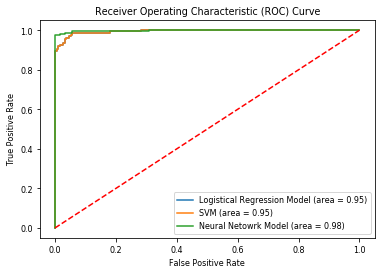

In [61]:
plt.figure()
plt.plot(fpr_reg, tpr_reg, label="Logistical Regression Model (area = %0.2f)"% Log_ROC_auc_reg)
plt.plot(fpr_svm, tpr_svm, label="SVM (area = %0.2f)"% Log_ROC_auc_svm)
plt.plot(fpr_neuro, tpr_neuro, label="Neural Netowrk Model (area = %0.2f)"% Log_ROC_auc_neuro)
plt.plot([0,1],[0,1],"r--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("images/Log_ROC")
plt.show()

***